In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, re, string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('recession_tweets_oct_dec_22.csv')
df

,Unnamed: 0,Date,User,Tweet,likeCount,replyCount,retweetCount,location
0,0,2022-12-13 23:47:18+00:00,NickMorenoLive,They are barking loud now that they can't pay ...,0,0,0,United States
1,1,2022-12-13 23:46:49+00:00,InvariantPersp1,#recession ... #GFC2 US #CPI #Consumer #Inflat...,2,0,0,NaN
2,2,2022-12-13 23:46:02+00:00,FXStreetNews,GBP/JPY eyes downside to near 167.00 as furthe...,2,0,0,Barcelona
3,3,2022-12-13 23:37:23+00:00,Frugalology,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
4,4,2022-12-13 23:36:55+00:00,FrugalMag,Frugal Tips on How to Save Money on Groceries ...,0,0,0,Texas
...,...,...,...,...,...,...,...,...
34845,34845,2022-10-01 00:29:26+00:00,Nippi25James,"I’m so poor, I can’t even pay attention! #Mini...",0,0,0,UK
34846,34846,2022-10-01 00:25:54+00:00,Wealth_Nodes,Stanley Black and Decker cut about 1000 financ...,0,0,0,NaN
34847,34847,2022-10-01 00:16:46+00:00,MortgageMark,Prepare yourself accordingly #recession #canad...,1,0,0,"Burnaby, BC, CA, V5E 4G2"
34848,34848,2022-10-01 00:07:54+00:00,haqsmusings,#India central bank chief Das raises interest ...,1,0,0,"Silicon Valley, CA"


In [3]:
df = df.drop(['Unnamed: 0', 'Date', 'User', 'likeCount', 'replyCount', 'retweetCount', 'location'], axis=1)
df

,Tweet
0,They are barking loud now that they can't pay ...
1,#recession ... #GFC2 US #CPI #Consumer #Inflat...
2,GBP/JPY eyes downside to near 167.00 as furthe...
3,Frugal Tips on How to Save Money on Groceries ...
4,Frugal Tips on How to Save Money on Groceries ...
...,...
34845,"I’m so poor, I can’t even pay attention! #Mini..."
34846,Stanley Black and Decker cut about 1000 financ...
34847,Prepare yourself accordingly #recession #canad...
34848,#India central bank chief Das raises interest ...


In [4]:
df.isnull().sum()

Tweet    0
dtype: int64

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Tweet'] = df['Tweet'].apply(clean)
df

,Tweet
0,they are barking loud now that they cant pay e...
1,recession gfc us cpi consumer inflation editi...
2,gbpjpy eyes downside to near as further boe r...
3,frugal tips on how to save money on groceries ...
4,frugal tips on how to save money on groceries ...
...,...
34845,im so poor i cant even pay attention minibudge...
34846,stanley black and decker cut about finance jo...
34847,prepare yourself accordingly recession canada
34848,india central bank chief das raises interest r...


In [6]:
for index, row in df['Tweet'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg > pos:
    df.loc[index, 'Sentiment'] = 'Negative'
  elif pos > neg:
    df.loc[index, 'Sentiment'] = 'Positive'
  else:
    df.loc[index, 'Sentiment'] = 'Neutral'

df

,Tweet,Sentiment
0,they are barking loud now that they cant pay e...,Positive
1,recession gfc us cpi consumer inflation editi...,Negative
2,gbpjpy eyes downside to near as further boe r...,Negative
3,frugal tips on how to save money on groceries ...,Positive
4,frugal tips on how to save money on groceries ...,Positive
...,...,...
34845,im so poor i cant even pay attention minibudge...,Negative
34846,stanley black and decker cut about finance jo...,Negative
34847,prepare yourself accordingly recession canada,Negative
34848,india central bank chief das raises interest r...,Negative


In [7]:
def count_tp_in_column(data,feature):
  total = data.loc[:,feature].value_counts(dropna=False)
  percentage = data.loc[:,feature].value_counts(dropna=False, normalize=True)*100
  return pd.concat([total, round(percentage,2)], axis=1, keys=['Total', 'Percentage'])

tp = count_tp_in_column(df,'Sentiment')
tp

,Total,Percentage
Negative,28452,81.64
Positive,6139,17.62
Neutral,259,0.74


<module 'matplotlib.pyplot' from 'D:\\Users\\light\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

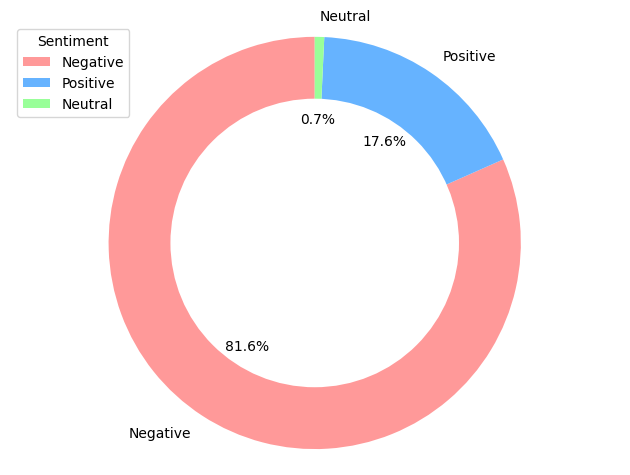

In [8]:
labels = tp.index
sizes = tp['Percentage']
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.legend(title='Sentiment')
plt

<module 'matplotlib.pyplot' from 'D:\\Users\\light\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

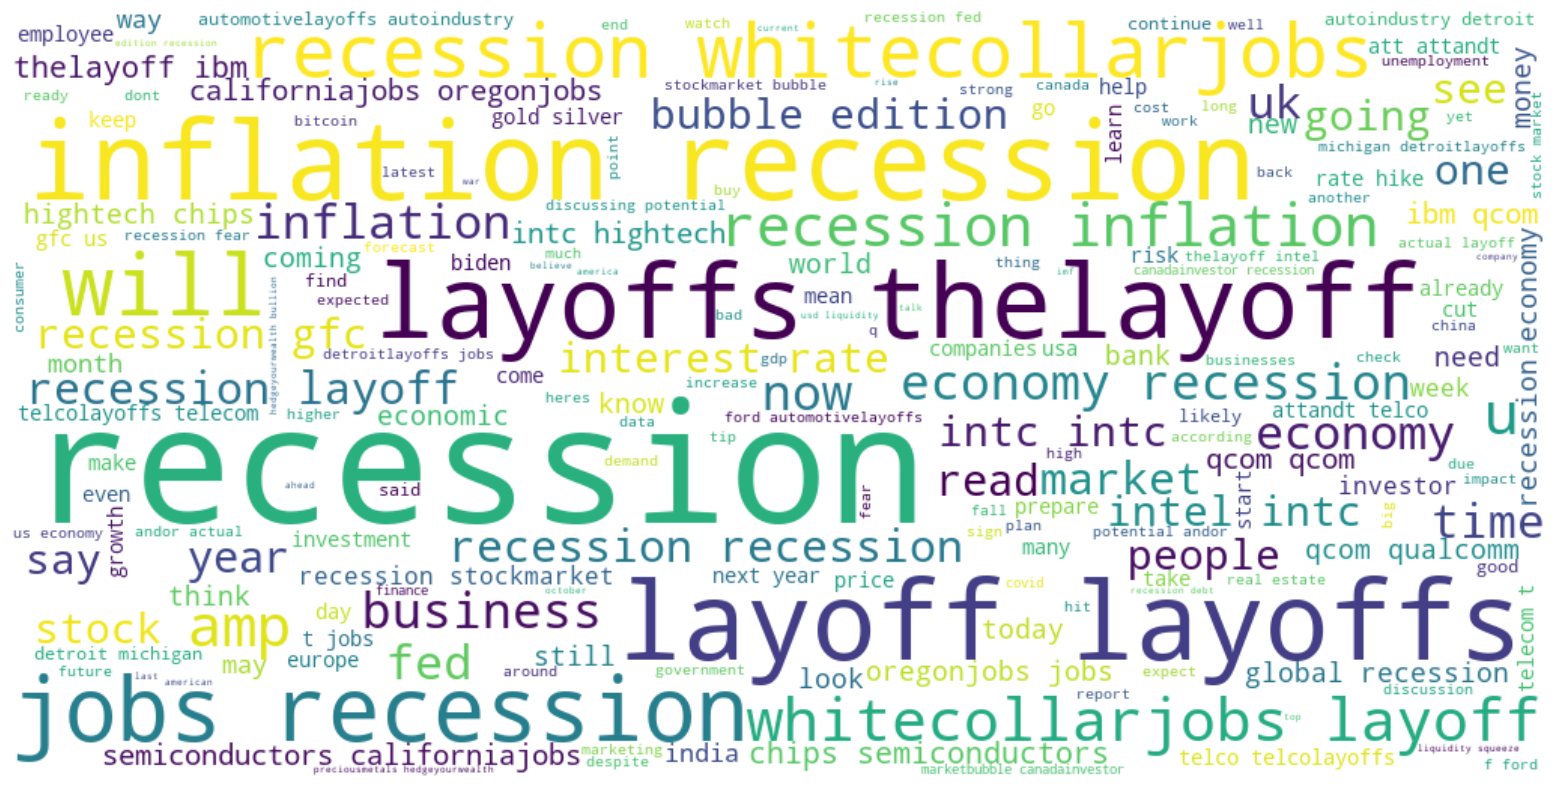

In [9]:
all_tweets = " ".join(tweet for tweet in df['Tweet'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt

<module 'matplotlib.pyplot' from 'D:\\Users\\light\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

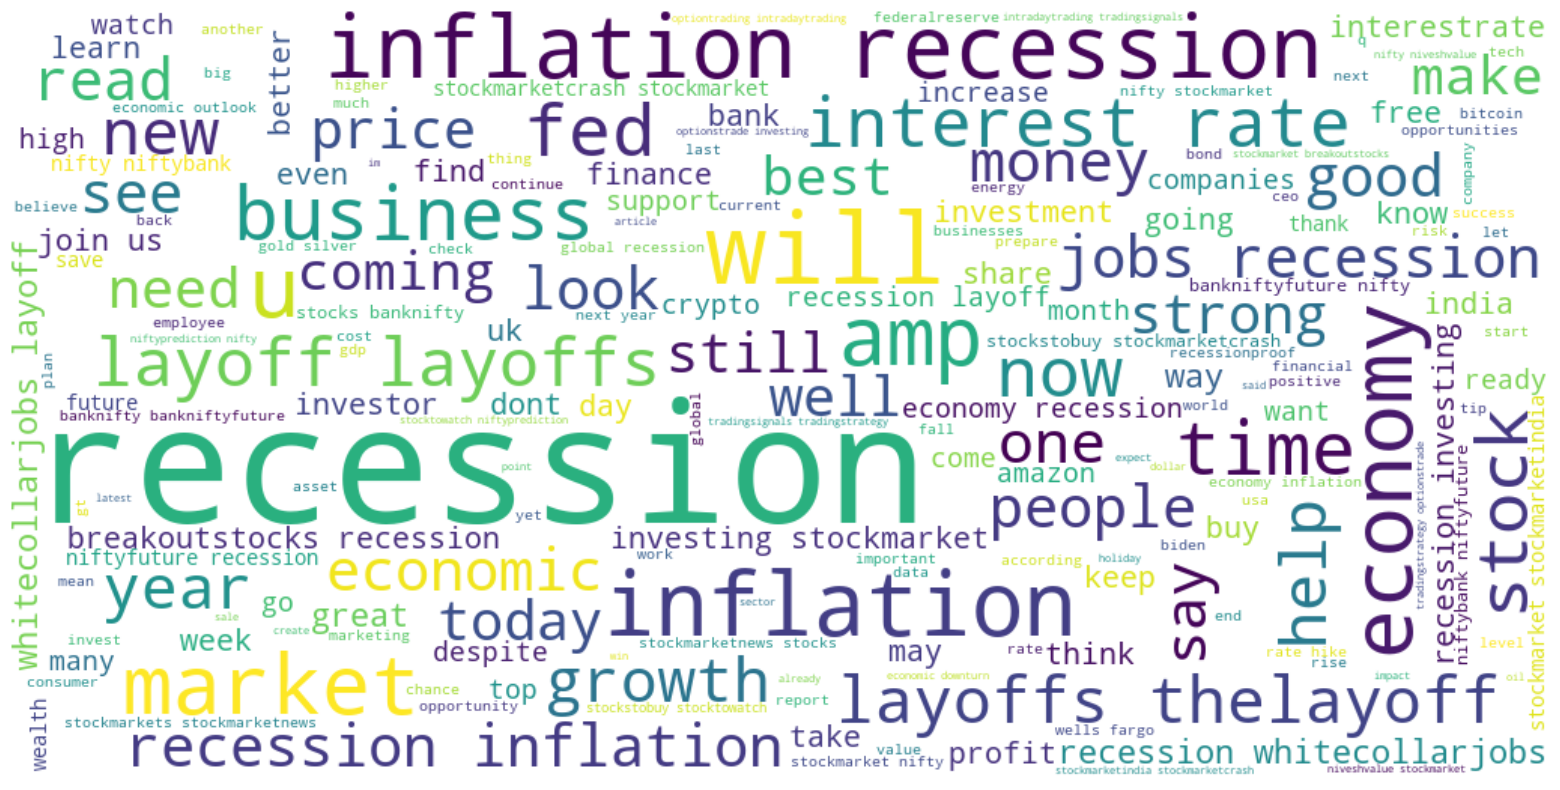

In [10]:
all_positive_tweets = " ".join(tweet for tweet in df[df['Sentiment'] == 'Positive']['Tweet'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_positive_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt

<module 'matplotlib.pyplot' from 'D:\\Users\\light\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

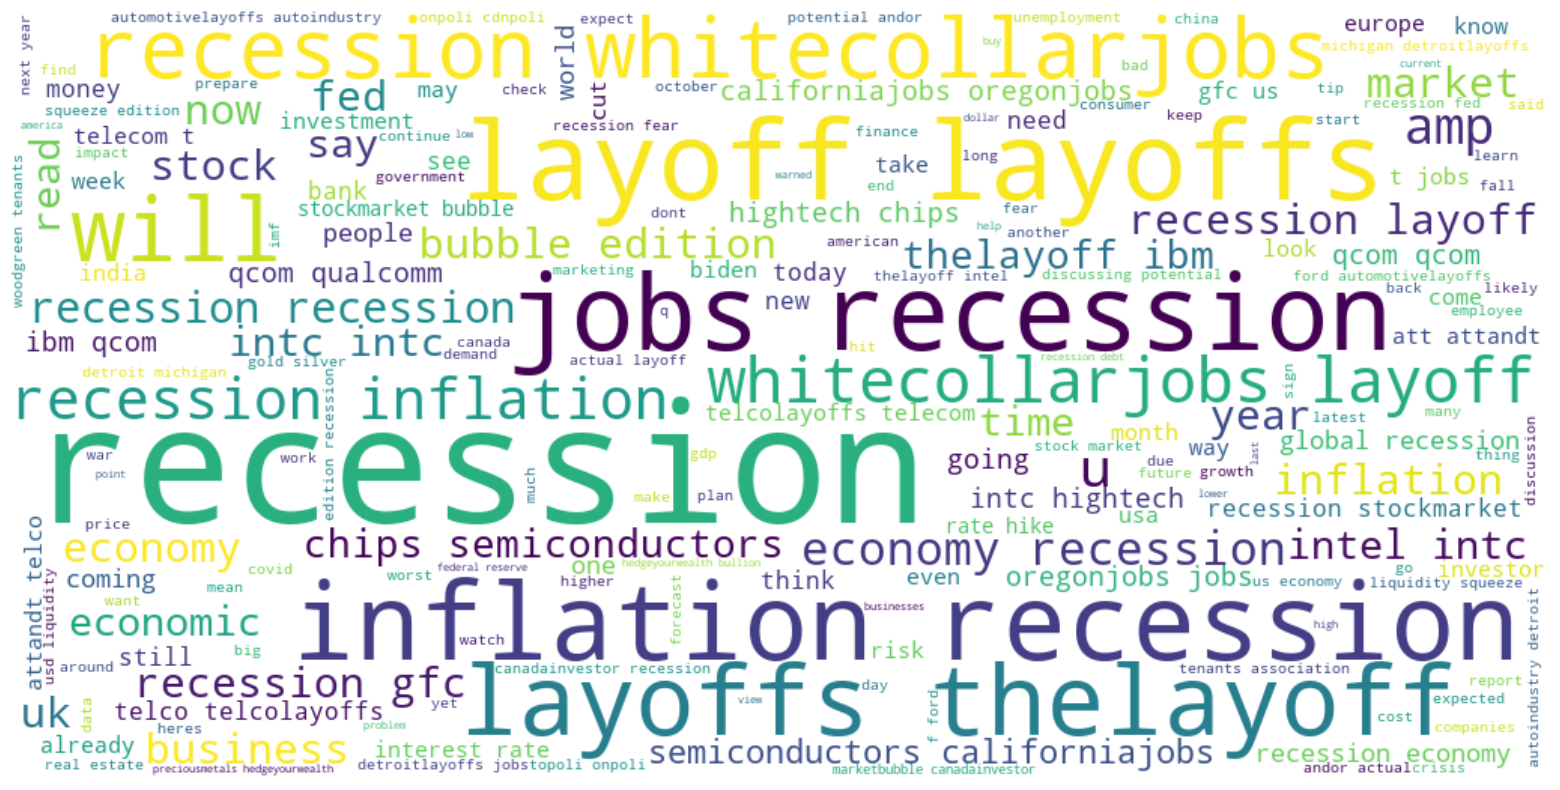

In [11]:
all_negative_tweets = " ".join(tweet for tweet in df[df['Sentiment'] == 'Negative']['Tweet'])

wordcloud = WordCloud(width=1024, height=512, random_state=21, max_font_size=110, background_color='white').generate(all_negative_tweets)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt